# Stay, Don't Leave! 
## Predicting employee churn at a hi-tech startup

Human capital is probably the most important asset of any company, especially as the world moves towards the knowledge economy employees is a very important aspect of any organization. The cost associated with the departure of employees is typically high, as departing employees leave with significant tribal knowledge and it is often difficult to replace employees with niche skills. Employee churn not only leads to loss of productivity, and delayed timelines, but might also have a significant impact on the brand image of the company. This case study examines why are employees leaving this startup and build a predictive model to compute the probability of high risk employees. Once the HR department is aware of who might potentially leave the company, they can take steps to retain them if they are desirable employees.



This case focuses on:
1. Exploratory data analysis
2. Classification
3. Model evaluation

# New Section

**Load the Data files**

In [43]:
! git clone https://github.com/vibsabhishek/EP290.git

Cloning into 'EP290'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 37 (delta 13), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), 4.41 MiB | 3.39 MiB/s, done.


In [42]:
! git clone https://github.com/kadowagg/UCI.git

fatal: destination path 'UCI' already exists and is not an empty directory.


In [ ]:
! rm -rf EP290

## Load the imporant libraries for EDA

In [44]:
#Import modules
import pandas as pd  # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
from scipy.stats import gaussian_kde

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns # for plotting graphs
from scipy.stats import gaussian_kde

## Load and explore the dataset

In [ ]:
dt = pd.read_excel('UCI/HR_tech_startup.xlsx')
dt.head()

In [46]:
hr_data=pandas.read_csv('EP290/HR_tech_startup.csv')
hr_data.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [47]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Q1. Generate the summary statistics for the data**


In [48]:
#Fill code here

In [49]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**Q2. Generate the correlation between different features in the data**

In [50]:
#Fill code here

In [51]:
hr_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## Visualize the data

### Histogram for number of projects by different employees

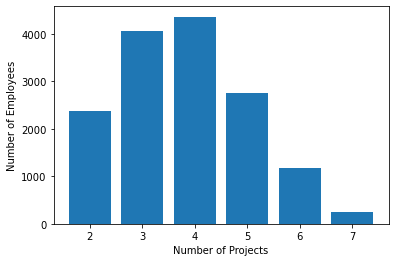

In [52]:
num_projects=hr_data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

### Histogram for salary levels

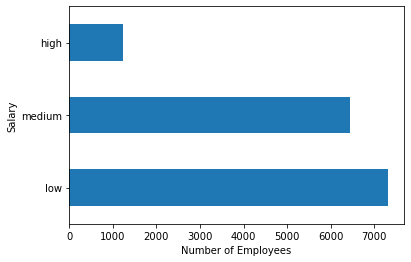

In [53]:
salary = hr_data['salary'].value_counts()
salary.plot(kind='barh')
plt.xlabel('Number of Employees')
plt.ylabel('Salary')
plt.show()

**Q3. Plot the distribution of last evaluation

In [54]:
#Fill code here

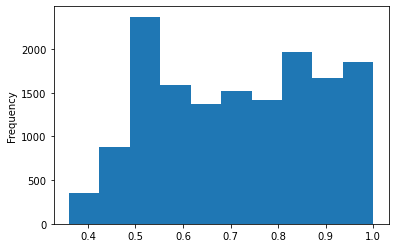

In [55]:
hr_data["last_evaluation"].plot.hist()

**Q4. What department is the largest based on employee strength?**

In [56]:
#Fill code here

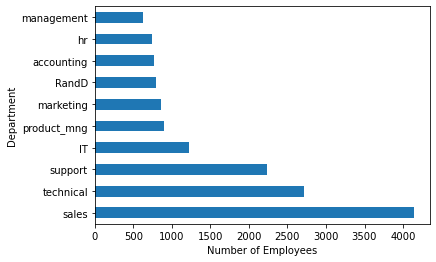

In [57]:
department_data = hr_data["Departments"].value_counts()
department_data.plot(kind='barh')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.show()

Which department?

## Understanding why employees are leaving the company

**Q5. Plot the distribution of the working hours.**



In [58]:
#Fill code here

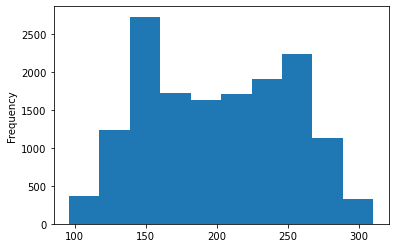

In [59]:
hr_data["average_montly_hours"].plot.hist()


What does this histogram tell you? - Write your answer here. 

**Q6. Are the working hours correlated with job satisfaction and the proclivity to leave? What does this indicate?**

In [60]:
#Fill code here

In [61]:
hr_data["average_montly_hours"].corr(hr_data["satisfaction_level"])

-0.020048113219472998

In [62]:
hr_data["average_montly_hours"].corr(hr_data["left"])

0.07128717878330115

What does the previous analysis tell you?

**Q7. Show these relationships visually.**

In [63]:
#Fill code here that shows the relationship between working hours and job satisfaction 

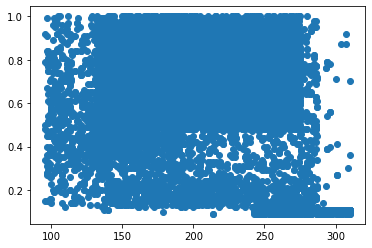

In [64]:
plt.scatter(hr_data["average_montly_hours"], hr_data["satisfaction_level"])

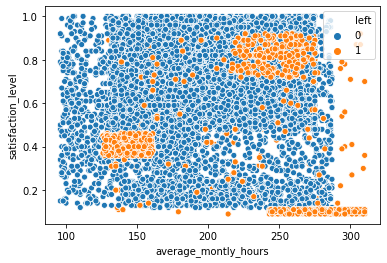

In [65]:
sns.scatterplot(hr_data["average_montly_hours"], hr_data["satisfaction_level"], hue=hr_data["left"])

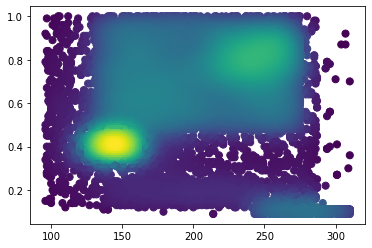

In [66]:
# color by density

x = hr_data["average_montly_hours"]
y = hr_data["satisfaction_level"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.show()


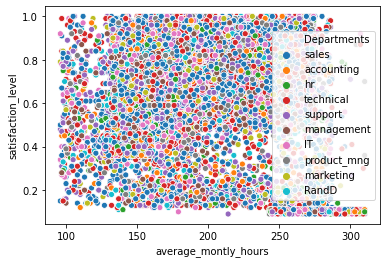

In [68]:
sns.scatterplot(x, y, hue=hr_data["Departments"])


**Q8. Perform analysis to determine who is leaving and why?** 

Are there distinct employee segments that are inclined to leave they company? Are the reasons for their departures similar? What insights can you draw from the exploratory analysis? (Hint: see how the left variable is associated with other features)

# Machine Learning - Classification

## Import ML libararies. 
sklearn is the workhorse ML package in Python

In [69]:
# Import LabelEncoder for converting categorical variables into numerical (dummy) variables
from sklearn import preprocessing as prep

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [70]:
#creating labelEncoder
le = prep.LabelEncoder()

# Converting categorical variables into numberic variables
hr_data['salary']=le.fit_transform(hr_data['salary'])
hr_data['Departments']=le.fit_transform(hr_data['Departments'])

### Split the data into predictors and outcome

In [71]:
X=hr_data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments', 'salary']]
X_labels = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments', 'salary']
y=hr_data['left']

### Split dataset into training set and test set

Note that here we are choosing 70% of the data to train the model and 30% of the data to test the model. Later on, you will see how changing this parameter affects the model performance.

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

### Build a Logistic Regression model

In [73]:
#Create Logistic Regression Classifier
lr = LogisticRegression()

#Train the LR model 
lr.fit(X_train, y_train)

#Predict the outcome for Test data
lr_y_pred = lr.predict(X_test)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, lr_y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, lr_y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, lr_y_pred))

# Confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, lr_y_pred))

Accuracy: 0.7595555555555555
Precision: 0.4904214559386973
Recall: 0.23880597014925373
Confusion matrix:
 [[3162  266]
 [ 816  256]]


**Q9. What is the accuracy of the Logistic Regrssion Model? How many times does it incorrectly predict that someone is leaving but they don't?**

** Fill answer here**

**Q10. Vary the test_size parameter in the train_test_split function and see how the accuracy changes. Plot the accuracy w.r.t. to this parameter.**

In [75]:
#Fill code here
test_sizes = [*fill in the different values you tried here, separated by commas*]
accuracies = [*fill in the accuracy levels get here, separated by commas*]

plt.plot(test_sizes, accuracies)

SyntaxError: invalid syntax (<ipython-input-75-221638ad7630>, line 2)

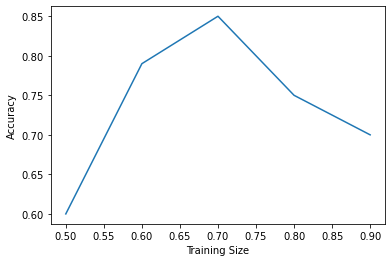

In [77]:
#Fill code here
train_sizes = [.5, .6, .7, .8, .9]
accuracies = [0.60, 0.79, 0.85, 0.75, 0.70]

plt.plot(train_sizes, accuracies)

plt.xlabel("Training Size")
plt.ylabel("Accuracy")

plt.show()


In [76]:
#Create Decison Tree  Classifier
dt = DecisionTreeClassifier()

#Train the DT model 
dt.fit(X_train, y_train)

#Predict the outcome for Test data
dt_y_pred = dt.predict(X_test)

**Q11. Compare the Decision Tree Classifier with the Logistic Regression (use a 70/30 split for training/test)**

In [78]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, dt_y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, dt_y_pred))

# Confusion matrix
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, dt_y_pred))

Accuracy: 0.9735555555555555
Precision: 0.9320036264732547
Recall: 0.9589552238805971
Confusion matrix:
 [[3353   75]
 [  44 1028]]


**Q12. Compare different models such as MultinomialNB, SVM, MLPClassifier. Which model performs best on this data set?**

In [79]:
#Fill code here

nb = GaussianNB()

#Fill in code for training, testing and measuring accuracy

svm = SVR()

#Fill in code for training, testing and measuring accuracy

nn = MLPClassifier()

#Fill in code for training, testing and measuring accuracy


